# Capstone Project: "Transforming Neighborhoods by Predicting Crime Outcomes in the UK
# Name: Marina Mnoyan
# Contact: marina.mnoyan@gmail.com
# Date: July 4, 2022
# Project Purpose:
Help policymakers to identify and address the factors that influence whether crimes are solved. The main dataset was downloaded from the UK Police Department website. Additional datasets were acquired from various UK Government sources in order to provide neighborhood-level characteristics. 


# Project Framework & Deliverables

    1. Data Acquisition, pre-processing with MS Excel & Git Bash       MS Excel, Git Bash (details in the ReadMe text file)         2. Main dataset Wrangling, Processing & Cleaning                   Jupyter Notebook 1     
    3. Additional dataset Merging, Wrangling, Processing & Cleaning    Jupyter Notebook 2    
    4. Exploratory Data Analysis & Visualizations                      Jupyter Notebook 3     
                                                                       Tableau File
    5. Feature Engineering                                             Jupyter Notebook 4     <== current notebook
    6. Modeling & Evaluation                                           Jupyter Notebook 5
    7. Findings & Recommendations                                      PDF Business Report
                                                                       PDF Presentation
    8. Additional Information including links to original data         ReadMe text file# STOP HERE

# Jupyter Notebook 4 of 5: Feature Engineering 
Steps:
* [1. Importing the dataset](#1)

* [2. Feature Engineering](#2)
    * [2a) LSOA Name & Code](2a)
    * [2b) Police Jurisdiction](2b)
    * [2c) Crime Type](2c)
    * [2d) Last Outcome Category](2d)
    
* [3. CSV Output](#3)

<a id='1'></a>
## 1) Importing the dataset from Jupyter Notebook #3

First, we will import packages that will help with feature engineering:

In [34]:
# Import data science packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

Then we need to make CSV files readable for Jupyter Notebook. We will import the file created at the end of Jupyter Notebook 3.

In [2]:
# Importing the CSV file
df = pd.read_csv('data/df_crime_FeatureEng.csv', index_col=False)

Let's perform some very basic checks to make sure everything was imported properly:

In [3]:
# Getting the option display all columns in the dataset
pd.get_option("display.max_columns")

# Setting to display all columns in the dataset
pd.set_option("display.max_columns", None)

# Checking the first 5 rows of the dataset
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754


In [4]:
# Checking the size of the dataset
df.shape

(3730444, 37)

Everything checks out so we can move to Feature Engineering.

<a id='2'></a>
## 2) Feature Engineering

First of all, let's take a look at all our columns:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730444 entries, 0 to 3730443
Data columns (total 37 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Month                              float64
 1   Police_Jurisdiction                object 
 2   Longitude                          float64
 3   Latitude                           float64
 4   LSOA code                          object 
 5   LSOA name                          object 
 6   Crime type                         object 
 7   Last outcome category              object 
 8   Population                         float64
 9   Proportion_Males                   float64
 10  Proportion_0-15                    float64
 11  Proportion_16-29                   float64
 12  Proportion_30-44                   float64
 13  Proportion_45-64                   float64
 14  Proportion_65+                     float64
 15  Proportion_0car_hhlds              float64
 16  #_ppl_hhld        

Majority of columns are numeric. We have the following non-numeric columns:
* `Police_Jurisdiction`: We can create dummy variables using One Hot Encoder
* `LSOA code`: Now that we are done with the EDA and merging of datasets, we no longer need this column
* `LSOA name`: We do not need this column but we will create a dictionary linking it to LSOA code for any potential future use
* `Crime type`: We can create dummy variables using One Hot Encoder
* `Last outcome category`: This is our dependent variable, however it is significantly imbalanced as we could see from the EDA. We will dichotomize it by creating two buckets, one where the Suspect was Identified and another where the Suspect was not Identified.

<a id='2a'></a>
### 2a) LSOA Name & Code

We do not either of these for our current project, however we will retain them in a separate dictionary prior to removing them from this dataset.

In [6]:
# Creating a dictionary with LSOA codes as keys and LSOA name as values
LSOA_names = df.set_index('LSOA code').to_dict()['LSOA name']

In [7]:
# Checking the size of the dictionary
print("The length of the dictionary is {}".format(len(LSOA_names)))

The length of the dictionary is 28874


Now, we can remove these from our dataframe. 

In [8]:
# Dropping columns
df.drop(axis=0, columns=['LSOA code', 'LSOA name'], inplace=True)

Performing sanity check:

In [9]:
# Checking first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754


<a id='2b'></a>
### 2b) Police Jurisdiction

We decided that we need to create dummy variables for this feature. We will use OneHotEncoder for this.

In [10]:
# Instantiate encoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
police_jurisdiction = pd.DataFrame(df['Police_Jurisdiction'])

# Fit and transform data
encoded = ohe.fit_transform(police_jurisdiction)

# Interpret
encoded

<3730444x42 sparse matrix of type '<class 'numpy.float64'>'
	with 3730444 stored elements in Compressed Sparse Row format>

In [11]:
# Convert from sparse to dense
dense_array = encoded.toarray()
dense_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Viewing classes stored in encoder
ohe.categories_

[array(['Avon and Somerset Constabulary', 'Bedfordshire Police',
        'Cambridgeshire Constabulary', 'Cheshire Constabulary',
        'City of London Police', 'Cleveland Police',
        'Cumbria Constabulary', 'Derbyshire Constabulary',
        'Devon & Cornwall Police', 'Dorset Police', 'Durham Constabulary',
        'Dyfed-Powys Police', 'Essex Police',
        'Gloucestershire Constabulary', 'Gwent Police',
        'Hampshire Constabulary', 'Hertfordshire Constabulary',
        'Humberside Police', 'Kent Police', 'Lancashire Constabulary',
        'Leicestershire Police', 'Lincolnshire Police',
        'Merseyside Police', 'Metropolitan Police Service',
        'Norfolk Constabulary', 'North Wales Police',
        'North Yorkshire Police', 'Northamptonshire Police',
        'Northumbria Police', 'Nottinghamshire Police',
        'South Wales Police', 'South Yorkshire Police',
        'Staffordshire Police', 'Suffolk Constabulary', 'Surrey Police',
        'Sussex Police', 'Thame

In [13]:
# Put into a dataframe to get column names
police_jurisdiction_df = pd.DataFrame(dense_array, dtype=int, columns=ohe.categories_)

# Show
police_jurisdiction_df.head()

,Avon and Somerset Constabulary,Bedfordshire Police,Cambridgeshire Constabulary,Cheshire Constabulary,City of London Police,Cleveland Police,Cumbria Constabulary,Derbyshire Constabulary,Devon & Cornwall Police,Dorset Police,Durham Constabulary,Dyfed-Powys Police,Essex Police,Gloucestershire Constabulary,Gwent Police,Hampshire Constabulary,Hertfordshire Constabulary,Humberside Police,Kent Police,Lancashire Constabulary,Leicestershire Police,Lincolnshire Police,Merseyside Police,Metropolitan Police Service,Norfolk Constabulary,North Wales Police,North Yorkshire Police,Northamptonshire Police,Northumbria Police,Nottinghamshire Police,South Wales Police,South Yorkshire Police,Staffordshire Police,Suffolk Constabulary,Surrey Police,Sussex Police,Thames Valley Police,Warwickshire Police,West Mercia Police,West Midlands Police,West Yorkshire Police,Wiltshire Police
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we are ready to merge the two datasets.

In [14]:
# Concatenate all dataframes into one
df = pd.concat([df, police_jurisdiction_df], axis=1)

In [15]:
# Setting the option to see all columns
pd.set_option('display.max_columns', None)

In [16]:
# Inspect
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious,"(Avon and Somerset Constabulary,)","(Bedfordshire Police,)","(Cambridgeshire Constabulary,)","(Cheshire Constabulary,)","(City of London Police,)","(Cleveland Police,)","(Cumbria Constabulary,)","(Derbyshire Constabulary,)","(Devon & Cornwall Police,)","(Dorset Police,)","(Durham Constabulary,)","(Dyfed-Powys Police,)","(Essex Police,)","(Gloucestershire Constabulary,)","(Gwent Police,)","(Hampshire Constabulary,)","(Hertfordshire Constabulary,)","(Humberside Police,)","(Kent Police,)","(Lancashire Constabulary,)","(Leicestershire Police,)","(Lincolnshire Police,)","(Merseyside Police,)","(Metropolitan Police Service,)","(Norfolk Constabulary,)","(North Wales Police,)","(North Yorkshire Police,)","(Northamptonshire Police,)","(Northumbria Police,)","(Nottinghamshire Police,)","(South Wales Police,)","(South Yorkshire Police,)","(Staffordshire Police,)","(Suffolk Constabulary,)","(Surrey Police,)","(Sussex Police,)","(Thames Valley Police,)","(Warwickshire Police,)","(West Mercia Police,)","(West Midlands Police,)","(West Yorkshire Police,)","(Wiltshire Police,)"
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Drop pre-encoded non-numeric column
df.drop(columns=['Police_Jurisdiction'], inplace=True)

In [18]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730444 entries, 0 to 3730443
Data columns (total 76 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Month                              float64
 1   Longitude                          float64
 2   Latitude                           float64
 3   Crime type                         object 
 4   Last outcome category              object 
 5   Population                         float64
 6   Proportion_Males                   float64
 7   Proportion_0-15                    float64
 8   Proportion_16-29                   float64
 9   Proportion_30-44                   float64
 10  Proportion_45-64                   float64
 11  Proportion_65+                     float64
 12  Proportion_0car_hhlds              float64
 13  #_ppl_hhld                         float64
 14  Deprivation_Index                  float64
 15  Job_Seeker_Allowance_Proportion    float64
 16  FSM11to15Proportio

Please note that we did not drop one of the columns as we will be using Random Forest which uses regularization. We will deal with multicollinearity for logistic regression at the feature selection stage.

<a id='2c'></a>
### 2c) Crime Outcome

We will perform similar operations to the ones we performed on Police Jurisdiction.

We decided that we need to create dummy variables for this feature. We will use OneHotEncoder for this.

In [19]:
# Instantiate encoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
crime_type = pd.DataFrame(df['Crime type'])

# Fit and transform data
encoded = ohe.fit_transform(crime_type)

# Interpret
encoded

<3730444x13 sparse matrix of type '<class 'numpy.float64'>'
	with 3730444 stored elements in Compressed Sparse Row format>

In [20]:
# Convert from sparse to dense
dense_array = encoded.toarray()
dense_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
# Viewing classes stored in encoder
ohe.categories_

[array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
        'Vehicle crime', 'Violence and sexual offences'], dtype=object)]

In [22]:
# Put into a dataframe to get column names
crime_type_df = pd.DataFrame(dense_array, dtype=int, columns=ohe.categories_)

# Show
crime_type_df.head()

,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1


Now we are ready to merge the two datasets.

In [23]:
# Concatenate all dataframes into one
df = pd.concat([df, crime_type_df], axis=1)

In [24]:
# Inspect
df.head()

,Month,Longitude,Latitude,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious,"(Avon and Somerset Constabulary,)","(Bedfordshire Police,)","(Cambridgeshire Constabulary,)","(Cheshire Constabulary,)","(City of London Police,)","(Cleveland Police,)","(Cumbria Constabulary,)","(Derbyshire Constabulary,)","(Devon & Cornwall Police,)","(Dorset Police,)","(Durham Constabulary,)","(Dyfed-Powys Police,)","(Essex Police,)","(Gloucestershire Constabulary,)","(Gwent Police,)","(Hampshire Constabulary,)","(Hertfordshire Constabulary,)","(Humberside Police,)","(Kent Police,)","(Lancashire Constabulary,)","(Leicestershire Police,)","(Lincolnshire Police,)","(Merseyside Police,)","(Metropolitan Police Service,)","(Norfolk Constabulary,)","(North Wales Police,)","(North Yorkshire Police,)","(Northamptonshire Police,)","(Northumbria Police,)","(Nottinghamshire Police,)","(South Wales Police,)","(South Yorkshire Police,)","(Staffordshire Police,)","(Suffolk Constabulary,)","(Surrey Police,)","(Sussex Police,)","(Thames Valley Police,)","(Warwickshire Police,)","(West Mercia Police,)","(West Midlands Police,)","(West Yorkshire Police,)","(Wiltshire Police,)","(Bicycle theft,)","(Burglary,)","(Criminal damage and arson,)","(Drugs,)","(Other crime,)","(Other theft,)","(Possession of weapons,)","(Public order,)","(Robbery,)","(Shoplifting,)","(Theft from the person,)","(Vehicle crime,)","(Violence and sexual offences,)"
0,1.0,-2.515072,51.419357,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,-2.494870,51.422276,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,-2.511927,51.409435,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,-2.511761,51.409966,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
# Drop pre-encoded non-numeric column
df.drop(columns=['Crime type'], inplace=True)

In [27]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730444 entries, 0 to 3730443
Data columns (total 88 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Month                              float64
 1   Longitude                          float64
 2   Latitude                           float64
 3   Last outcome category              object 
 4   Population                         float64
 5   Proportion_Males                   float64
 6   Proportion_0-15                    float64
 7   Proportion_16-29                   float64
 8   Proportion_30-44                   float64
 9   Proportion_45-64                   float64
 10  Proportion_65+                     float64
 11  Proportion_0car_hhlds              float64
 12  #_ppl_hhld                         float64
 13  Deprivation_Index                  float64
 14  Job_Seeker_Allowance_Proportion    float64
 15  FSM11to15Proportion                float64
 16  FSM5to10Proportion

Please note that we did not drop one of the columns as we will be using Random Forest which uses regularization. We will deal with multicollinearity for logistic regression at the feature selection stage.

<a id='2d'></a>
### 2d) Last Outcome Category

This will be our dependent variable. We are interested understanding factors that predict whether the suspect will be identified or not in committed crimes. 

First of all, let's take a look at all categories:

In [29]:
# Unique categories
df['Last outcome category'].unique()

array(['Status update unavailable', 'Unable to prosecute suspect',
       'Local resolution',
       'Investigation complete; no suspect identified',
       'Further investigation is not in the public interest',
       'Awaiting court outcome', 'Offender given a caution',
       'Under investigation', 'Court result unavailable',
       'Suspect charged as part of another case',
       'Action to be taken by another organisation',
       'Offender given a drugs possession warning',
       'Offender given penalty notice'], dtype=object)

We can see that there some outcomes that are still unknown or pending investigation, namely `Status update unavailable` and `Under investigation`. We can drop these as we are only interested in the crimes for which we already know the outcomes. 

In [30]:
# Dropping rows where the outcome is not known
df.drop(df[df['Last outcome category'] == 'Status update unavailable'].index, inplace=True)

In [31]:
# Dropping rows where the outcome is not known
df.drop(df[df['Last outcome category'] == 'Under investigation'].index, inplace=True)

Now we are ready to dichotomize our dependent variable by assigning all investigations where Suspect has not been identified to 0, and all others to 1.

In [32]:
# Assigning the column to either 0 or 1
df['Suspect Identified'] = np.where(df["Last outcome category"] == 'Investigation complete; no suspect identified', 0, 1)

Let's check our class imbalance:

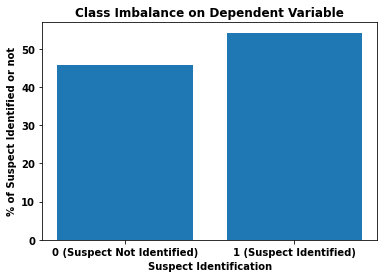

Class imbalance: [0.46 0.54]


In [35]:
# Calculating number of unique values and normalizing them 
values, counts = np.unique(df['Suspect Identified'], return_counts=True)
normalized_counts = counts/counts.sum()

# Plotting normalized counts
plt.figure()
plt.bar(["0 (Suspect Not Identified)", "1 (Suspect Identified)"], normalized_counts*100) 
plt.xlabel('Suspect Identification')
plt.ylabel('% of Suspect Identified or not')
plt.title('Class Imbalance on Dependent Variable')
plt.show()

# Checking class imbalance
print(f"Class imbalance: {np.round(normalized_counts, 2)}")

We have a fairly balanced dependent variable which will serve us well when we perform modeling.

<a id='3'></a>
## 3) CSV Output

We are done with feature engineering at this stage. We could have performed some log transformations here but we decided to hold off until the modeling stage so we can compare model performance. Given that we are most interested in feature importance and interpretation, we'd rather not transform any features unless necessary.

In [36]:
# Exporting the dataframe to a CSV file
df.to_csv(r'data\df_crime_Model.csv', index=False)

### This is the end of Jupyter Notebook 4 (of 5). Please proceed to Jupyter Notebook 5.